# AutoGluon Decimal MinMaxNorm

In [2]:
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
decimalDf = TabularDataset('../decimal_minmaxnorm_dataset.csv')

/Users/axelsariel/repos/HousingDemographics/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_data, test_data = train_test_split(decimalDf, test_size=0.25, random_state=0)
label = 'GrowthRate'
train_data[label].describe()

count    187594.000000
mean          0.037885
std           0.021942
min           0.000000
25%           0.033898
50%           0.036268
75%           0.039685
max           1.000000
Name: GrowthRate, dtype: float64

In [4]:
predictor = TabularPredictor(label=label).fit(train_data, time_limit=300)

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_220611"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.


Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20240429_220611"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.11.6
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 23.0.0: Fri Sep 15 14:42:42 PDT 2023; root:xnu-10002.1.13~1/RELEASE_X86_64
CPU Count:          8
Memory Avail:       5.98 GB / 16.00 GB (37.4%)
Disk Space Avail:   1.58 GB / 371.60 GB (0.4%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    187594
Train Data Columns: 6
Label Column:       GrowthRate
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.0, 0.0, 0.03789, 0.02194)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predi

In [5]:
y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred.head()

11553     0.037793
1177      0.037845
3111      0.038365
111294    0.037937
173138    0.038022
Name: GrowthRate, dtype: float32

In [6]:
y_pred.describe()

count    62532.000000
mean         0.038079
std          0.000735
min          0.025833
25%          0.037669
50%          0.037868
75%          0.038247
max          0.077946
Name: GrowthRate, dtype: float64

In [7]:
predictor.evaluate(test_data, silent=True)

{'root_mean_squared_error': -0.022866577855627946,
 'mean_squared_error': -0.0005228803828274943,
 'mean_absolute_error': -0.004755569380020216,
 'r2': 0.0012429774417439532,
 'pearsonr': 0.03625260587273514,
 'median_absolute_error': -0.003287918122844402}

In [10]:
resultsDf = predictor.leaderboard(test_data)
resultsDf

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,-0.022865,-0.026536,root_mean_squared_error,0.250617,0.014385,42.058240,0.250617,0.014385,42.058240,1,True,7
1,WeightedEnsemble_L2,-0.022867,-0.026528,root_mean_squared_error,4.204469,0.143033,215.735435,0.004834,0.000340,0.011672,2,True,8
2,NeuralNetFastAI,-0.022882,-0.026537,root_mean_squared_error,0.800345,0.028400,154.807088,0.800345,0.028400,154.807088,1,True,5
3,XGBoost,-0.022884,-0.026535,root_mean_squared_error,0.028578,0.003652,0.467558,0.028578,0.003652,0.467558,1,True,6
4,ExtraTreesMSE,-0.023553,-0.027112,root_mean_squared_error,3.120095,0.096255,18.390877,3.120095,0.096255,18.390877,1,True,4
5,RandomForestMSE,-0.023966,-0.028009,root_mean_squared_error,2.828636,0.098683,58.216993,2.828636,0.098683,58.216993,1,True,3
6,KNeighborsUnif,-0.024914,-0.028690,root_mean_squared_error,2.455884,0.132406,3.091798,2.455884,0.132406,3.091798,1,True,1
7,KNeighborsDist,-0.025859,-0.028923,root_mean_squared_error,2.533638,0.101957,0.280654,2.533638,0.101957,0.280654,1,True,2


In [9]:
predictor.feature_importance(train_data)

Computing feature importance via permutation shuffling for 6 features using 5000 rows with 5 shuffle sets...


	64.74s	= Expected runtime (12.95s per shuffle set)
	23.78s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
WHITE,0.000507,0.000103,0.000191,5,0.000718,2.955595e-04
HISPANIC_OR_LATINO,0.000471,0.000136,0.000747,5,0.000750,1.910613e-04
BLACK_OR_AFRICAN_AMERICAN,0.000412,0.000082,0.000175,5,0.000580,2.440826e-04
ASIAN,0.000383,0.000141,0.001885,5,0.000674,9.134509e-05
AMERICAN_INDIAN_AND_ALASKA_NATIVE,0.000232,0.000147,0.012002,5,0.000534,-6.979293e-05
NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER,0.000009,0.000004,0.004374,5,0.000018,3.407208e-07


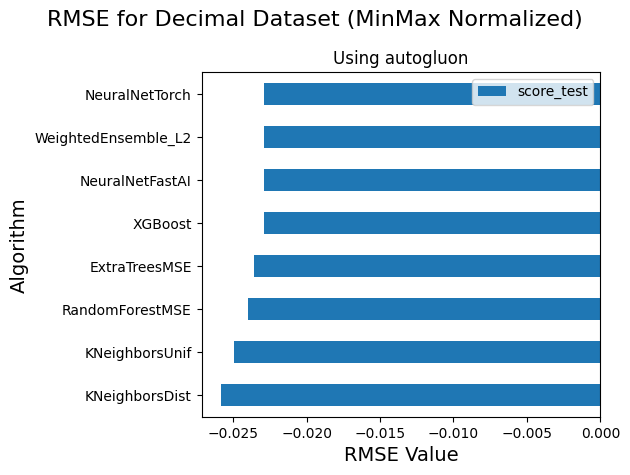

In [13]:
import matplotlib.pyplot as plt
toPlot = resultsDf.sort_values('score_test')
ax = toPlot.plot.barh(x='model', y='score_test')
plt.title('Using autogluon', fontsize=12)
plt.suptitle('RMSE for Decimal Dataset (MinMax Normalized)', fontsize=16)
plt.xlabel('RMSE Value', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)
plt.tight_layout()